## 이미지 데이터 전처리

In [1]:
import os

input_dir = "/aiffel/aiffel/motorcycle/MotorDataset/images"
target_dir = "/aiffel/aiffel/motorcycle/MotorDataset/annotations"

input_img_files = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".png")])
target_img_files = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

In [2]:
# 입력 데이터 파일 확인
input_img_files

['/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (309).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (310).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (311).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (312).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (313).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (314).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (317).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (318).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (319).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (321).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (322).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (323).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (324).png',
 '/aiffel/aiffel/motorcycle/MotorDataset/images/Screenshot (325).png',
 '/aif

In [3]:
# 타겟 데이터 파일 확인
target_img_files

['/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (309).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (310).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (311).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (312).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (313).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (314).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (317).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (318).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (319).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (321).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/annotations/Screenshot (322).png___fuse.png',
 '/aiffel/aiffel/motorcycle/MotorDataset/an

In [4]:
# 입력 데이터 개수 확인
len(input_img_files)

200

In [5]:
# 타겟 데이터 개수 확인
len(target_img_files)

200

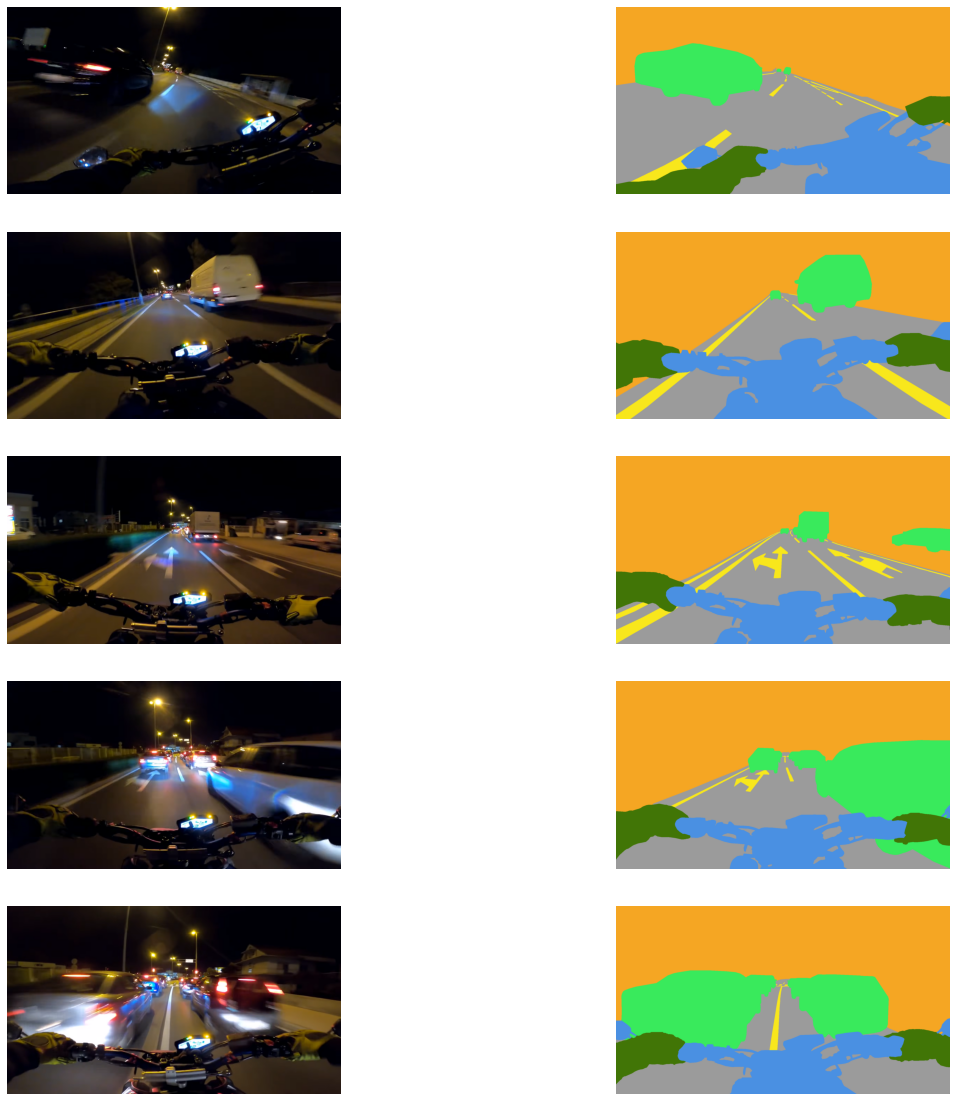

In [6]:
# 데이터 시각화 확인
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.figure(figsize=(20,20))
for j in range(5):
    plt.subplot(5, 2, 2 * j + 1)
    plt.axis("off")
    plt.imshow(load_img(input_img_files[j]))
    plt.subplot(5, 2, 2 * j + 2)
    plt.axis("off")
    plt.imshow(load_img(target_img_files[j]))

In [7]:
# 타겟 데이터의 내부 값 확인
import numpy as np

target = load_img(target_img_files[0],color_mode='grayscale')
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

array([ 89, 132, 155, 165, 175, 213], dtype=uint8)

In [8]:
# 타겟 데이터의 내부 값 확인
import numpy as np

target = load_img(target_img_files[3],color_mode='grayscale')
print(target.size)
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

(1920, 1080)


array([ 89, 132, 155, 165, 175, 213], dtype=uint8)

**라벨 6개로 구성되어있음을 확인할 수 있다**

In [9]:
label = dict()

for i in range(6):
    label[color[i]] = i

In [10]:
label

{89: 0, 132: 1, 155: 2, 165: 3, 175: 4, 213: 5}

In [11]:
import numpy as np
import random

img_size = (128, 128)
num_imgs = len(input_img_files)

random.Random(1337).shuffle(input_img_files)
random.Random(1337).shuffle(target_img_files)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8")
    for c in color:
        img = np.where(img==c, label[c], img)
        
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_files[i])
    targets[i] = path_to_target(target_img_files[i])

In [12]:
targets[0].shape

(128, 128, 1)

In [13]:
input_imgs[0].shape

(128, 128, 3)

In [14]:
input_imgs[0]

array([[[ 8.,  7., 20.],
        [ 8.,  7., 18.],
        [ 7.,  5., 19.],
        ...,
        [ 7.,  5., 19.],
        [ 7.,  6., 17.],
        [ 7.,  6., 17.]],

       [[ 7.,  6., 20.],
        [ 7.,  5., 19.],
        [ 7.,  5., 19.],
        ...,
        [ 7.,  5., 19.],
        [ 7.,  5., 19.],
        [ 7.,  5., 19.]],

       [[ 8.,  7., 20.],
        [ 8.,  7., 20.],
        [ 7.,  5., 19.],
        ...,
        [ 7.,  5., 19.],
        [ 7.,  5., 19.],
        [ 7.,  5., 19.]],

       ...,

       [[19., 19., 26.],
        [21., 18., 26.],
        [21., 18., 26.],
        ...,
        [ 8.,  7., 20.],
        [ 7.,  5., 19.],
        [ 7.,  5., 19.]],

       [[21., 18., 26.],
        [20., 17., 24.],
        [21., 18., 26.],
        ...,
        [13.,  9., 23.],
        [ 7.,  6., 20.],
        [ 7.,  5., 19.]],

       [[21., 18., 26.],
        [21., 18., 26.],
        [21., 18., 26.],
        ...,
        [19., 16., 26.],
        [14., 10., 22.],
        [ 8.,  7., 18.]]

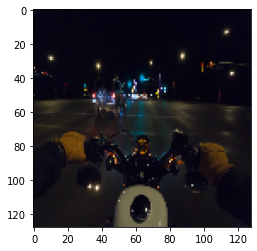

In [15]:
plt.imshow(input_imgs[0]/255)

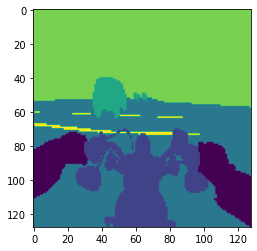

In [16]:
plt.imshow(targets[0]/255)

In [17]:
num_test_samples = int(0.2 * num_imgs)
num_val_samples = int(0.2 * num_imgs)
train_input_imgs = input_imgs[:-(num_test_samples + num_val_samples)]
train_targets = targets[:-(num_test_samples + num_val_samples)]
val_input_imgs = input_imgs[-(num_test_samples + num_val_samples):-num_test_samples]
val_targets = targets[-(num_test_samples + num_val_samples):-num_test_samples]
test_input_imgs = input_imgs[-num_test_samples:]
test_targets = targets[-num_test_samples:]

In [18]:
len(train_input_imgs)

120

In [19]:
len(val_input_imgs)

40

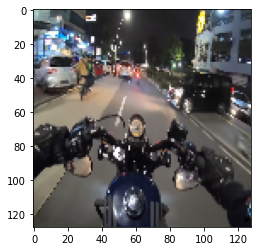

In [20]:
plt.imshow(input_imgs[120]/255)

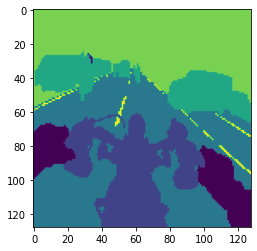

In [21]:
plt.imshow(targets[120]/255)

## 데이터 증강

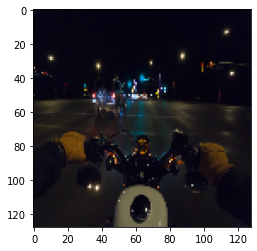

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# 데이터 증강을 수행하는 함수 (좌우 반전 포함)
def augment(image, label):
    # 랜덤 좌우 반전
    concat_img_label = tf.concat([image, label], axis=-1)
    concat_img_label_flipped = tf.image.random_flip_left_right(concat_img_label)
    
    # 좌우 반전 후 다시 이미지와 라벨로 분리
    image_flipped, label_flipped = tf.split(concat_img_label_flipped, [3, 1], axis=-1)
    
    return image_flipped, label_flipped

# 데이터셋의 각 이미지에 증강을 적용
for i in range(120):
    train_input_imgs[i], train_targets[i] = augment(train_input_imgs[i], train_targets[i])

# 이미지 표시
plt.imshow(train_input_imgs[0]/255)  # 이미지를 0에서 1 사이의 값으로 스케일링
plt.show()



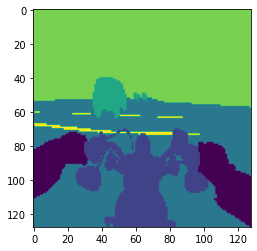

In [23]:
plt.imshow(train_targets[0]/255)

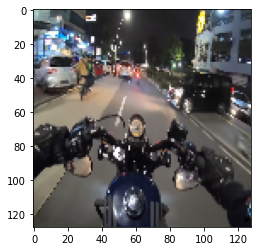

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# 데이터 증강을 수행하는 함수 (좌우 반전 포함)
def augment(image, label):
    # 랜덤 좌우 반전
    concat_img_label = tf.concat([image, label], axis=-1)
    concat_img_label_flipped = tf.image.random_flip_left_right(concat_img_label)
    
    # 좌우 반전 후 다시 이미지와 라벨로 분리
    image_flipped, label_flipped = tf.split(concat_img_label_flipped, [3, 1], axis=-1)
    
    return image_flipped, label_flipped

# 데이터셋의 각 이미지에 증강을 적용
for i in range(40):
    val_input_imgs[i], val_targets[i] = augment(val_input_imgs[i], val_targets[i])

# 이미지 표시
plt.imshow(val_input_imgs[0]/255)  # 이미지를 0에서 1 사이의 값으로 스케일링
plt.show()


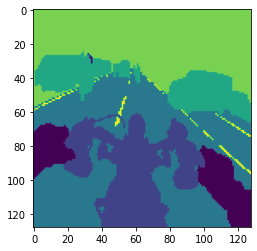

In [25]:
plt.imshow(val_targets[0]/255)

## 모델 정의 및 학습

***
**U-Net**
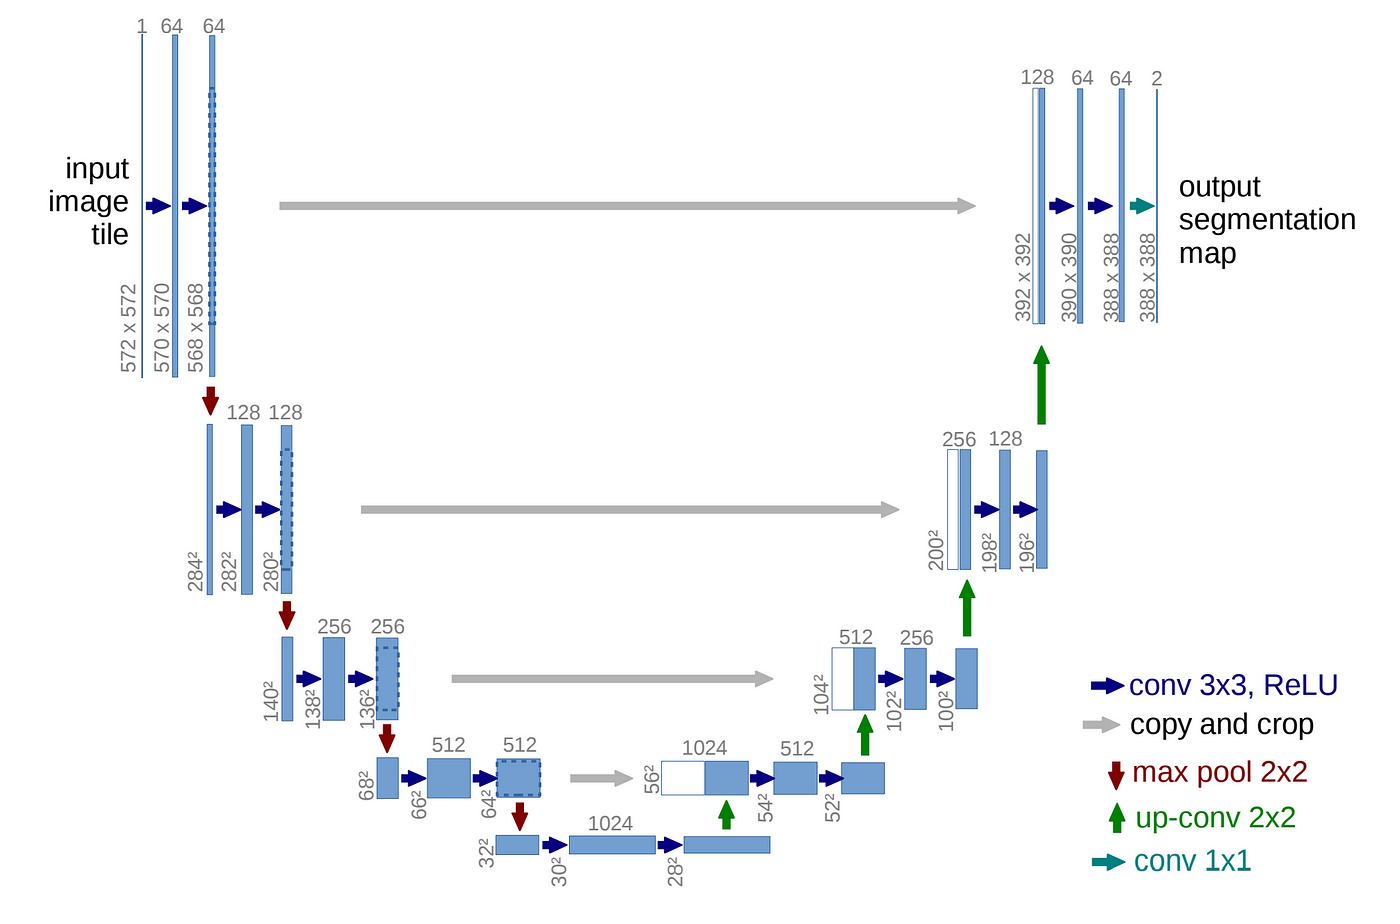

In [26]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def build_model(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    #Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(rescaling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
  
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool4) 
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv5)
  
    #Expanding Path
    up6 = Conv2DTranspose(512, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv5)
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv6)
    up7 = Conv2DTranspose(256, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv7)
    up8 = Conv2DTranspose(128, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv8)
    up9 = Conv2DTranspose(64, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv9)     
    conv10 = Conv2D(num_classes, 3, activation='softmax', padding='same',kernel_initializer='he_normal')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    return model

In [27]:
model = build_model(img_size=img_size, num_classes=6)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        rescaling[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
______________________________________________________________________________________________

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model_unet.h5", save_best_only=True)

history = model.fit(train_input_imgs, train_targets, 
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100
8/8 [==============================] - 16s 817ms/step - loss: 1.5923 - accuracy: 0.3678 - val_loss: 1.4572 - val_accuracy: 0.4597
Epoch 2/100
8/8 [==============================] - 2s 202ms/step - loss: 1.6350 - accuracy: 0.3897 - val_loss: 1.5338 - val_accuracy: 0.3199
Epoch 3/100
8/8 [==============================] - 2s 202ms/step - loss: 1.4559 - accuracy: 0.4073 - val_loss: 1.4950 - val_accuracy: 0.4451
Epoch 4/100
8/8 [==============================] - 2s 202ms/step - loss: 1.3951 - accuracy: 0.4823 - val_loss: 1.4007 - val_accuracy: 0.4426
Epoch 5/100
8/8 [==============================] - 2s 201ms/step - loss: 1.2860 - accuracy: 0.4716 - val_loss: 1.2579 - val_accuracy: 0.5070
Epoch 6/100
8/8 [==============================] - 2s 203ms/step - loss: 1.2200 - accuracy: 0.5144 - val_loss: 1.2349 - val_accuracy: 0.5001
Epoch 7/100
8/8 [==============================] - 2s 202ms/step - loss: 1.1094 - accuracy: 0.5553 - val_loss: 1.1528 - val_accuracy: 0.5544
Epoch 8/100


## 학습 결과 평가 - Unet

/tmp/ipykernel_32874/3882679504.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_32874/3882679504.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, "b", label="Validation accuracy", color = 'red')


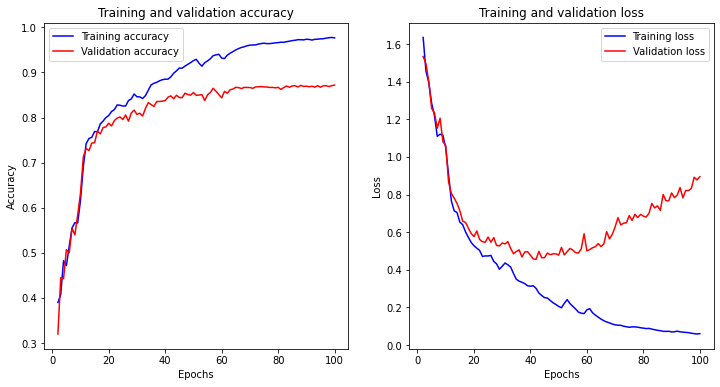

In [29]:
# 손실 그래프
epochs = range(2, len(history.history["loss"]) + 1)
loss = history.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss = history.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc = history.history["accuracy"][1:]
val_acc = history.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [30]:
from tensorflow.keras.models import load_model

test_loss, test_accuracy = model.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 6s 40ms/step - loss: 0.7350 - accuracy: 0.8828
Test Loss: 0.7350010275840759
Test Accuracy: 0.8828048706054688


In [31]:
prediction = model.predict(test_input_imgs)

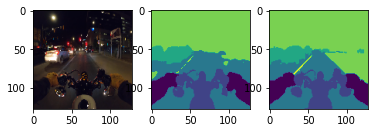

In [32]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output = np.argmax(prediction[0], axis=-1)
plt.imshow(output)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [33]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [1]:
# IoU 계산 및 출력
iou_values = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output = np.argmax(prediction[i], axis=-1)
    plt.imshow(output)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou = calculate_iou(test_targets[i], output)
    iou_values.append(iou)
    print(f"IoU for sample {i + 1}: {iou}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [35]:
# 전체 평균 IoU 출력
average_iou = np.mean(iou_values)
print(f"\nAverage IoU across all samples: {average_iou}")


Average IoU across all samples: 0.8395620309435863


**주어진 데이터는 클래스가 6개로 나누어진 데이터이므로 이렇게 하면 안될 것 같다..**

**클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    for class_index in range(6):  # 클래스 수에 따라 반복
        plt.subplot(2, 6, class_index + 1)
        output = np.argmax(prediction[i], axis=-1)
        plt.imshow(output == class_index)
        plt.title(f"Predicted Class {class_index}")
        
        plt.subplot(2, 6, class_index + 7)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [37]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(6):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [38]:
IoUs, areas = calculate_iou_score(targets[0], prediction[0])

In [39]:
sum(IoUs) / 6

0.4693934729874447

In [40]:
sum([iou * area for iou, area in zip(IoUs, areas)]) # 영역의 크기로 가중치

0.6862928701259633

***
**U-net++**
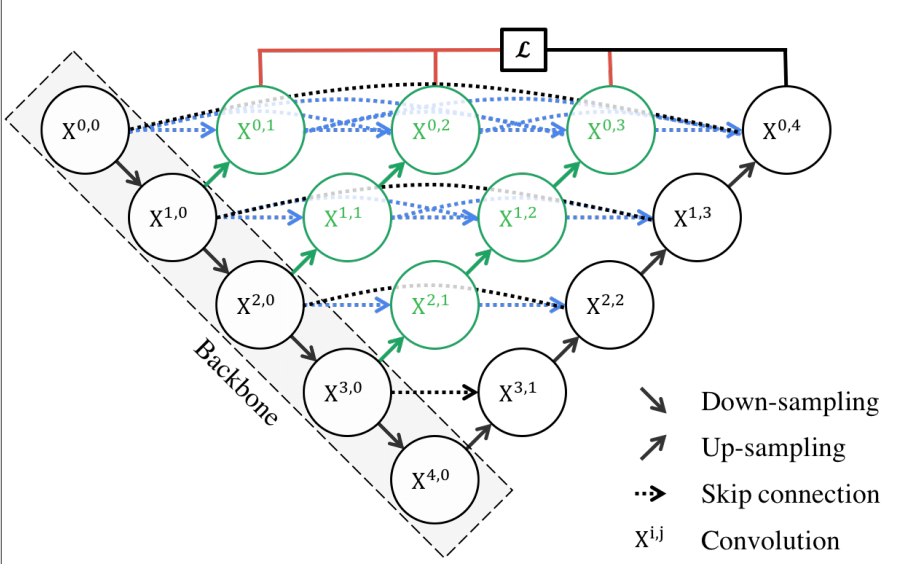

In [41]:
from keras.layers import UpSampling2D

def build_model2(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    # X0,0
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(inputs)
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_0)
    pool0_0 = MaxPooling2D(pool_size=(2, 2))(conv0_0)
    # X1,0
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool0_0)
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_0)
    pool1_0 = MaxPooling2D(pool_size=(2, 2))(conv1_0)
    # X2,0
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1_0)
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_0)
    pool2_0 = MaxPooling2D(pool_size=(2, 2))(conv2_0)
    # X3,0
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2_0)
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_0)
    pool3_0 = MaxPooling2D(pool_size=(2, 2))(conv3_0)
    # X4,0
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3_0)  
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4_0)

    # X0,1
    up1_0 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_0)) 
    merge0_1 = concatenate([up1_0, conv0_0], axis = 3)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_1)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_1)
    # X1,1
    up2_0 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_0))
    merge1_1 = concatenate([up2_0, conv1_0], axis = 3)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_1)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_1)
    # X2,1
    up3_0 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_0))
    merge2_1 = concatenate([up3_0, conv2_0], axis = 3)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_1)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_1)
    # X3,1
    up4_0 = Conv2D(512, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv4_0))
    merge3_1 = concatenate([up4_0, conv3_0], axis = 3)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge3_1)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_1)  
    
    # X0,2
    up1_1 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_1)) 
    merge0_2 = concatenate([up1_1, conv0_0, conv0_1], axis = 3)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_2)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_2)
    # X1,2
    up2_1 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_1))
    merge1_2 = concatenate([up2_1, conv1_0, conv1_0], axis = 3)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_2)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_2)
    # X2,2
    up3_1 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_1))
    merge2_2 = concatenate([up3_1, conv2_0, conv2_1], axis = 3)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_2)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_2)

    # X0,3
    up1_2 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_2)) 
    merge0_3 = concatenate([up1_2, conv0_0, conv0_1, conv0_2], axis = 3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_3)
    # X1,3
    up2_2 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_2))
    merge1_3 = concatenate([up2_2, conv1_0, conv1_1, conv1_2], axis = 3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_3)
    
    # X0,4
    up1_3 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_3)) 
    merge0_4 = concatenate([up1_3, conv0_0, conv0_1, conv0_2, conv0_3], axis = 3)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_4)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_4)
              
    output = Conv2D(num_classes, 1, activation='softmax')(conv0_4)
    
    model = Model(inputs = inputs, outputs = output)
    
    return model

In [42]:
model2 = build_model2(img_size=img_size, num_classes=6)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 64) 36928       conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 64)   0           conv2d_20[0][0]                  
____________________________________________________________________________________________

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model2_unet++.h5", save_best_only=True)

history2 = model2.fit(train_input_imgs, train_targets, 
                    epochs=100, 
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


Epoch 1/100
8/8 [==============================] - 19s 1s/step - loss: 21892.0098 - accuracy: 0.2409 - val_loss: 27.9612 - val_accuracy: 0.2397
Epoch 2/100
8/8 [==============================] - 5s 678ms/step - loss: 17.5324 - accuracy: 0.3075 - val_loss: 7.1348 - val_accuracy: 0.3532
Epoch 3/100
8/8 [==============================] - 5s 675ms/step - loss: 6.6025 - accuracy: 0.3985 - val_loss: 6.6075 - val_accuracy: 0.2907
Epoch 4/100
8/8 [==============================] - 5s 674ms/step - loss: 5.3166 - accuracy: 0.3500 - val_loss: 4.4008 - val_accuracy: 0.3603
Epoch 5/100
8/8 [==============================] - 5s 676ms/step - loss: 3.3141 - accuracy: 0.4206 - val_loss: 3.5675 - val_accuracy: 0.4223
Epoch 6/100
8/8 [==============================] - 5s 676ms/step - loss: 2.8488 - accuracy: 0.4193 - val_loss: 2.6898 - val_accuracy: 0.3969
Epoch 7/100
8/8 [==============================] - 5s 674ms/step - loss: 2.3473 - accuracy: 0.4460 - val_loss: 2.4652 - val_accuracy: 0.4541
Epoch 8/1

## 학습 결과 평가 - Unet++

/tmp/ipykernel_32874/3937450789.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs2, val_loss2, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_32874/3937450789.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs2, val_acc2, "b", label="Validation accuracy", color = 'red')


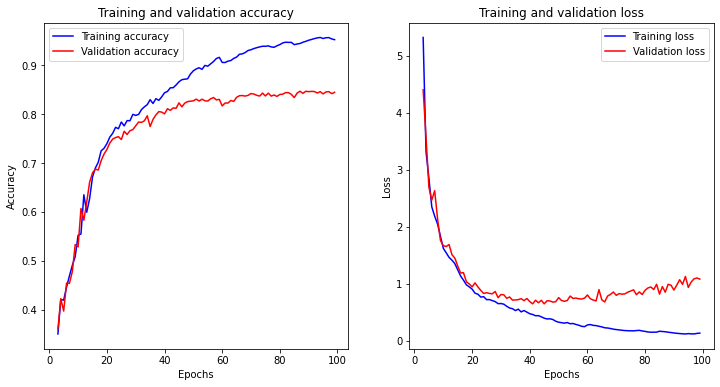

In [44]:
# 손실 그래프
epochs2 = range(3, len(history2.history["loss"]))
loss2 = history2.history["loss"][3:] # 3의 손실 함수가 너무 커서 제외
val_loss2 = history2.history["val_loss"][3:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs2, loss2, "b", label="Training loss")
plt.plot(epochs2, val_loss2, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc2 = history2.history["accuracy"][3:]
val_acc2 = history2.history["val_accuracy"][3:]

plt.subplot(1, 2, 1)
plt.plot(epochs2, acc2, "b", label="Training accuracy")
plt.plot(epochs2, val_acc2, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [45]:
from tensorflow.keras.models import load_model

test_loss2, test_accuracy2 = model2.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_accuracy2)

2/2 [==============================] - 7s 112ms/step - loss: 1.3786 - accuracy: 0.8475
Test Loss: 1.3785974979400635
Test Accuracy: 0.8475265502929688


In [46]:
prediction2 = model2.predict(test_input_imgs)

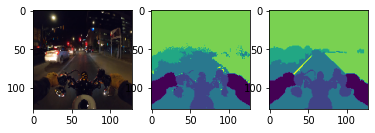

In [47]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output2 = np.argmax(prediction2[0], axis=-1)
plt.imshow(output2)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [48]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [3]:
# IoU 계산 및 출력
iou_values2 = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output2 = np.argmax(prediction2[i], axis=-1)
    plt.imshow(output2)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou2 = calculate_iou(test_targets[i], output2)
    iou_values2.append(iou2)
    print(f"IoU for sample {i + 1}: {iou2}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [50]:
# 전체 평균 IoU 출력
average_iou2 = np.mean(iou_values2)
print(f"\nAverage IoU across all samples: {average_iou2}")


Average IoU across all samples: 0.8529885533072609


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [4]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    for class_index in range(6):  # 클래스 수에 따라 반복
        plt.subplot(2, 6, class_index + 1)
        output2 = np.argmax(prediction2[i], axis=-1)
        plt.imshow(output2 == class_index)
        plt.title(f"Predicted Class {class_index}")
        
        plt.subplot(2, 6, class_index + 7)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()


In [52]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(6):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas


In [53]:
IoUs2, areas2 = calculate_iou_score(targets[0], prediction2[0])

In [54]:
sum(IoUs2) / 6

0.4262755952086114

In [55]:
sum([iou * area for iou, area in zip(IoUs2, areas2)]) # 영역의 크기로 가중치

0.6303274832967815

***
**segnet**
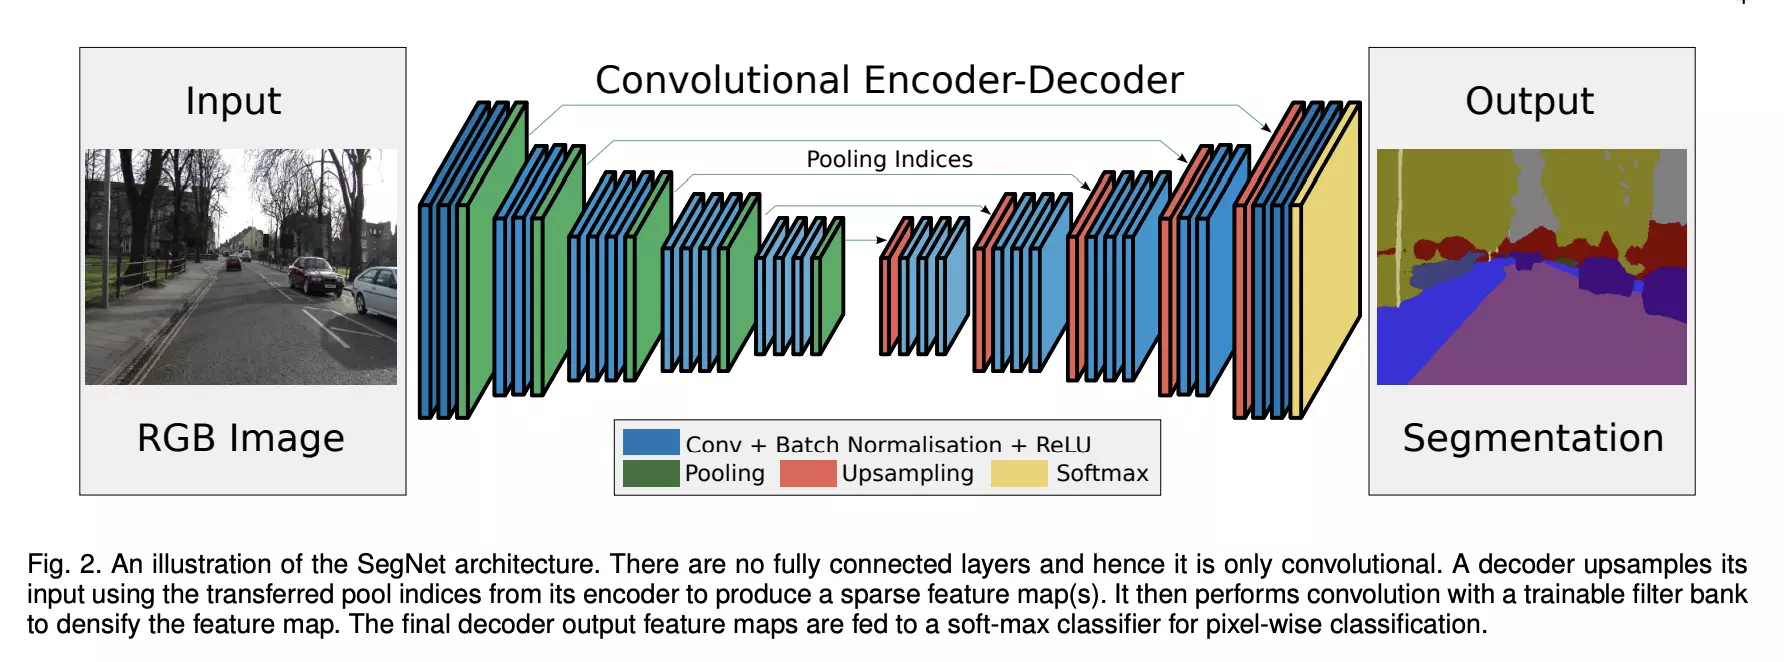

In [56]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

def build_model3(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_1 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_2 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_3 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_4 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Decoder
    # Block 4
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_4

    # Block 3
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_3

    # Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_2

    # Block 1
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_1

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [57]:
model3 = build_model3(img_size=img_size, num_classes=6)
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 128, 128, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d_60[0][0]                  
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 128, 128, 64) 36928       batch_normalization[0][0]        
____________________________________________________________________________________________

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model3_segnet.h5", save_best_only=True)

history3 = model3.fit(train_input_imgs, train_targets, 
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


Epoch 1/100
8/8 [==============================] - 4s 261ms/step - loss: 1.8041 - accuracy: 0.4660 - val_loss: 12203.6191 - val_accuracy: 0.1526
Epoch 2/100
8/8 [==============================] - 2s 208ms/step - loss: 0.9576 - accuracy: 0.7009 - val_loss: 122796.6016 - val_accuracy: 0.1550
Epoch 3/100
8/8 [==============================] - 2s 208ms/step - loss: 0.7819 - accuracy: 0.7354 - val_loss: 17216.3984 - val_accuracy: 0.3515
Epoch 4/100
8/8 [==============================] - 2s 208ms/step - loss: 0.7208 - accuracy: 0.7560 - val_loss: 4786.1074 - val_accuracy: 0.3196
Epoch 5/100
8/8 [==============================] - 2s 208ms/step - loss: 0.5872 - accuracy: 0.7989 - val_loss: 1875.0336 - val_accuracy: 0.3296
Epoch 6/100
8/8 [==============================] - 2s 209ms/step - loss: 0.5073 - accuracy: 0.8245 - val_loss: 505.6656 - val_accuracy: 0.3331
Epoch 7/100
8/8 [==============================] - 2s 209ms/step - loss: 0.4738 - accuracy: 0.8345 - val_loss: 320.8596 - val_accurac

## 학습 결과 평가 - segnet

/tmp/ipykernel_32874/3035506049.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs3, val_loss3, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_32874/3035506049.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs3, val_acc3, "b", label="Validation accuracy", color = 'red')


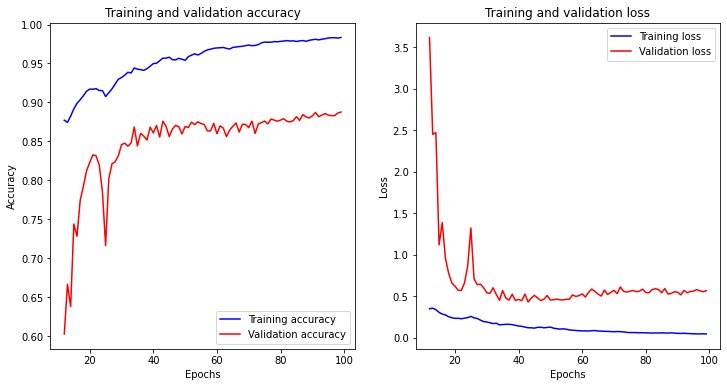

In [59]:
# 손실 그래프
epochs3 = range(12, len(history3.history["loss"])) # 12의 손실 함수가 너무 커서 그 이후로
loss3 = history3.history["loss"][12:]
val_loss3 = history3.history["val_loss"][12:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs3, loss3, "b", label="Training loss")
plt.plot(epochs3, val_loss3, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc3 = history3.history["accuracy"][12:]
val_acc3 = history3.history["val_accuracy"][12:]

plt.subplot(1, 2, 1)
plt.plot(epochs3, acc3, "b", label="Training accuracy")
plt.plot(epochs3, val_acc3, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [60]:
from tensorflow.keras.models import load_model

test_loss3, test_accuracy3 = model3.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

2/2 [==============================] - 0s 64ms/step - loss: 0.4619 - accuracy: 0.9001
Test Loss: 0.46192795038223267
Test Accuracy: 0.9000610113143921


In [61]:
prediction3 = model3.predict(test_input_imgs)

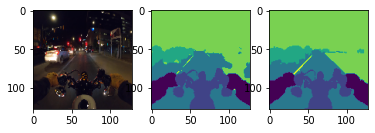

In [62]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output3 = np.argmax(prediction3[0], axis=-1)
plt.imshow(output3)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [63]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [5]:
# IoU 계산 및 출력
iou_values3 = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output3 = np.argmax(prediction3[i], axis=-1)
    plt.imshow(output3)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou3 = calculate_iou(test_targets[i], output3)
    iou_values3.append(iou3)
    print(f"IoU for sample {i + 1}: {iou3}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [65]:
# 전체 평균 IoU 출력
average_iou3 = np.mean(iou_values3)
print(f"\nAverage IoU across all samples: {average_iou3}")


Average IoU across all samples: 0.8483908592281825


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    for class_index in range(6):  # 클래스 수에 따라 반복
        plt.subplot(2, 6, class_index + 1)
        output3 = np.argmax(prediction3[i], axis=-1)
        plt.imshow(output3 == class_index)
        plt.title(f"Predicted Class {class_index}")
        
        plt.subplot(2, 6, class_index + 7)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()


In [67]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(6):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [68]:
IoUs3, areas3 = calculate_iou_score(targets[0], prediction3[0])

In [69]:
sum(IoUs3) / 6

0.4457982387527391

In [70]:
sum([iou * area for iou, area in zip(IoUs3, areas3)]) # 영역의 크기로 가중치

0.6524725939603685

***
**Deeplab**
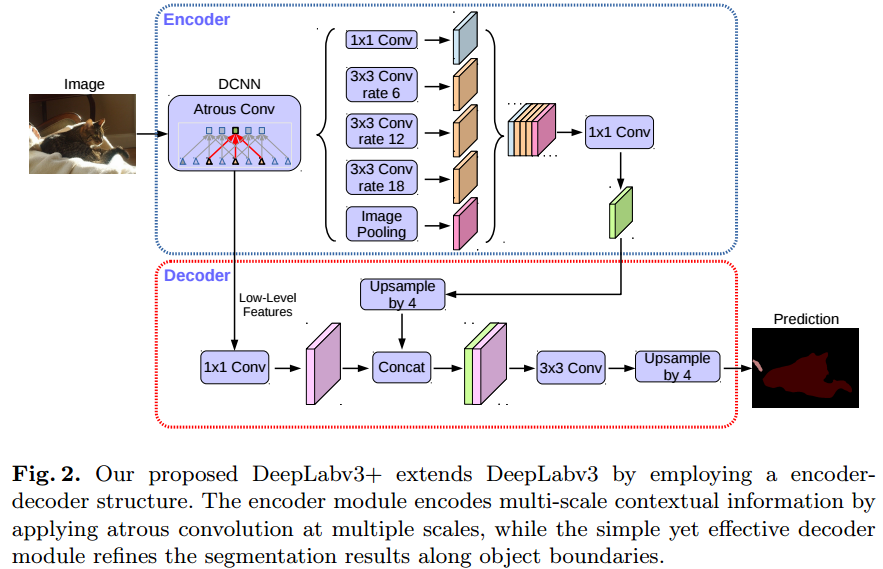

In [71]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [73]:
from tensorflow.keras.layers import Input, Rescaling, UpSampling2D, Conv2D, Concatenate
from tensorflow.keras import Model
import tensorflow.keras as keras
import tensorflow as tf

def DeeplabV3Plus(img_size, num_classes):
    inputs = Input(shape=img_size)
    rescaling = Rescaling(1./255)(inputs)
    
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=rescaling
    )
    
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = UpSampling2D(
        size=(img_size[0] // 4 // int(x.shape[1]), img_size[1] // 4 // int(x.shape[2])),
        interpolation="bilinear",
    )(x)
    
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = UpSampling2D(
        size=(img_size[0] // int(x.shape[1]), img_size[1] // int(x.shape[2])),
        interpolation="bilinear",
    )(x)
    model_output = Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    
    return Model(inputs=inputs, outputs=model_output)

img_size = (128, 128, 3)
num_classes = 6  # Example number of classes
model4 = DeeplabV3Plus(img_size=img_size, num_classes=num_classes)
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 128, 128, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           rescaling_3[0][0]                
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
____________________________________________________________________________________________

In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint

model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model4_Deeplab.h5", save_best_only=True)

history4 = model4.fit(train_input_imgs, train_targets, 
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


Epoch 1/100
8/8 [==============================] - 13s 617ms/step - loss: 2.9072 - accuracy: 0.5101 - val_loss: 1.7776 - val_accuracy: 0.4116


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
8/8 [==============================] - 1s 129ms/step - loss: 1.4846 - accuracy: 0.5615 - val_loss: 1.7713 - val_accuracy: 0.4840
Epoch 3/100
8/8 [==============================] - 1s 130ms/step - loss: 1.2960 - accuracy: 0.5675 - val_loss: 1.7529 - val_accuracy: 0.3608
Epoch 4/100
8/8 [==============================] - 1s 126ms/step - loss: 1.2436 - accuracy: 0.5649 - val_loss: 1.7546 - val_accuracy: 0.3533
Epoch 5/100
8/8 [==============================] - 1s 125ms/step - loss: 1.1240 - accuracy: 0.5920 - val_loss: 1.7918 - val_accuracy: 0.1036
Epoch 6/100
8/8 [==============================] - 1s 126ms/step - loss: 1.0892 - accuracy: 0.5860 - val_loss: 1.7632 - val_accuracy: 0.1762
Epoch 7/100
8/8 [==============================] - 1s 125ms/step - loss: 1.0485 - accuracy: 0.5708 - val_loss: 1.4917 - val_accuracy: 0.4062
Epoch 8/100
8/8 [==============================] - 1s 126ms/step - loss: 1.2329 - accuracy: 0.5476 - val_loss: 2.4705 - val_accuracy: 0.4266
Epoch 9/100
8

/tmp/ipykernel_32874/1787534551.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs4, val_loss4, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_32874/1787534551.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs4, val_acc4, "b", label="Validation accuracy", color = 'red')


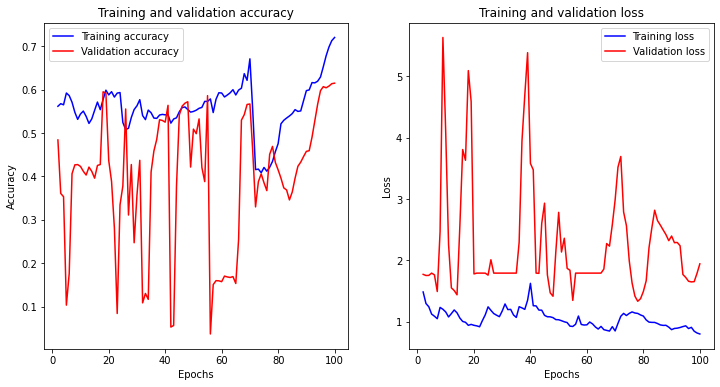

In [75]:
# 손실 그래프
epochs4 = range(2, len(history4.history["loss"]) + 1)
loss4 = history4.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss4 = history4.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs4, loss4, "b", label="Training loss")
plt.plot(epochs4, val_loss4, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc4 = history4.history["accuracy"][1:]
val_acc4 = history4.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs4, acc4, "b", label="Training accuracy")
plt.plot(epochs4, val_acc4, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**아직 수렴하지 못하는 느낌.. 더 에폭 돌려보자!**

In [76]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [77]:
from tensorflow.keras.layers import Input, Rescaling, UpSampling2D, Conv2D, Concatenate
from tensorflow.keras import Model
import tensorflow.keras as keras
import tensorflow as tf

def DeeplabV3Plus(img_size, num_classes):
    inputs = Input(shape=img_size)
    rescaling = Rescaling(1./255)(inputs)
    
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=rescaling
    )
    
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = UpSampling2D(
        size=(img_size[0] // 4 // int(x.shape[1]), img_size[1] // 4 // int(x.shape[2])),
        interpolation="bilinear",
    )(x)
    
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = UpSampling2D(
        size=(img_size[0] // int(x.shape[1]), img_size[1] // int(x.shape[2])),
        interpolation="bilinear",
    )(x)
    model_output = Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    
    return Model(inputs=inputs, outputs=model_output)

img_size = (128, 128, 3)
num_classes = 6  # Example number of classes
model4 = DeeplabV3Plus(img_size=img_size, num_classes=num_classes)
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 128, 128, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           rescaling_4[0][0]                
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
____________________________________________________________________________________________

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint

model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model4_Deeplab.h5", save_best_only=True)

history4 = model4.fit(train_input_imgs, train_targets, 
                    epochs=200,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


Epoch 1/200
8/8 [==============================] - 6s 254ms/step - loss: 2.6158 - accuracy: 0.5348 - val_loss: 2.0461 - val_accuracy: 0.1425
Epoch 2/200
8/8 [==============================] - 1s 128ms/step - loss: 1.1777 - accuracy: 0.6279 - val_loss: 2.8195 - val_accuracy: 0.4639
Epoch 3/200
8/8 [==============================] - 1s 129ms/step - loss: 1.0055 - accuracy: 0.6383 - val_loss: 8.3982 - val_accuracy: 0.4422
Epoch 4/200
8/8 [==============================] - 1s 126ms/step - loss: 0.9315 - accuracy: 0.6491 - val_loss: 8.6312 - val_accuracy: 0.4355
Epoch 5/200
8/8 [==============================] - 1s 127ms/step - loss: 0.8592 - accuracy: 0.6710 - val_loss: 8.2740 - val_accuracy: 0.4309
Epoch 6/200
8/8 [==============================] - 1s 127ms/step - loss: 0.8097 - accuracy: 0.6827 - val_loss: 6.1746 - val_accuracy: 0.4317
Epoch 7/200
8/8 [==============================] - 1s 128ms/step - loss: 0.8462 - accuracy: 0.6644 - val_loss: 6.0762 - val_accuracy: 0.4332
Epoch 8/200
8

/tmp/ipykernel_32874/1787534551.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs4, val_loss4, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_32874/1787534551.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs4, val_acc4, "b", label="Validation accuracy", color = 'red')


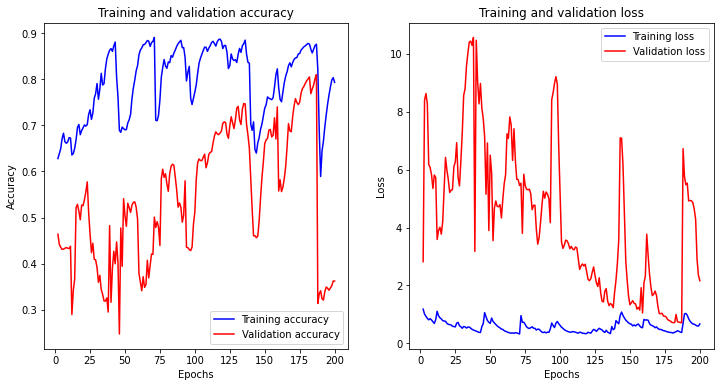

In [79]:
# 손실 그래프
epochs4 = range(2, len(history4.history["loss"]) + 1)
loss4 = history4.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss4 = history4.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs4, loss4, "b", label="Training loss")
plt.plot(epochs4, val_loss4, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc4 = history4.history["accuracy"][1:]
val_acc4 = history4.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs4, acc4, "b", label="Training accuracy")
plt.plot(epochs4, val_acc4, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [80]:
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
loaded_model4 = load_model("seg_model4_Deeplab.h5")

test_loss4, test_accuracy4 = loaded_model4.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss4)
print("Test Accuracy:", test_accuracy4)

2/2 [==============================] - 3s 26ms/step - loss: 0.5828 - accuracy: 0.8234
Test Loss: 0.5828255414962769
Test Accuracy: 0.8233596682548523


In [81]:
prediction4 = loaded_model4.predict(test_input_imgs)

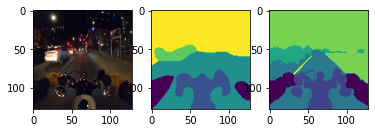

In [82]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output4 = np.argmax(prediction4[0], axis=-1)
plt.imshow(output4)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

In [83]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [7]:
# IoU 계산 및 출력
iou_values4 = []

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    output4 = np.argmax(prediction4[i], axis=-1)
    plt.imshow(output4)
    plt.title("Predicted Segmentation")

    plt.subplot(1, 3, 3)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # IoU 계산 및 출력
    iou4 = calculate_iou(test_targets[i], output4)
    iou_values4.append(iou4)
    print(f"IoU for sample {i + 1}: {iou4}")

    # 시각화를 위한 subplot 초기화
    plt.show()


In [85]:
# 전체 평균 IoU 출력
average_iou4 = np.mean(iou_values4)
print(f"\nAverage IoU across all samples: {average_iou4}")


Average IoU across all samples: 0.8616123400512654


**이것 역시, 클래스 별로 IoU 구하는 새로운 IoU 만들어 보자!**

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# IoU 계산 함수
def calculate_iou(y_true, y_pred, class_index):
    intersection = np.logical_and(y_true == class_index, y_pred == class_index)
    union = np.logical_or(y_true == class_index, y_pred == class_index)
    iou = np.sum(intersection) / np.sum(union)
    return iou

for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    for class_index in range(6):  # 클래스 수에 따라 반복
        plt.subplot(2, 6, class_index + 1)
        output4 = np.argmax(prediction4[i], axis=-1)
        plt.imshow(output4 == class_index)
        plt.title(f"Predicted Class {class_index}")
        
        plt.subplot(2, 6, class_index + 7)
        plt.imshow(test_targets[i]==class_index)
        plt.title(f"Target Class {class_index}")

    # 시각화를 위한 subplot 초기화
    plt.show()

In [87]:
def calculate_iou_score(target, prediction):
# 각 픽셀별로 어떤 클래스로 예측하고 있는지를 알아야 함
# (128, 128, 6) -> (128, 128, 1)
    one_c_prediction = np.argmax(prediction, axis=2)
    one_c_target = target[:, :, 0]

    # 이미지의 전체 영역 크기 계산
    total_area = one_c_prediction.shape[0] ** 2

    # 각 클래스에 대한 IoU 및 영역 정보를 저장할 리스트 초기화
    IoUs = []
    areas = []

    for class_i in range(6):
        # 해당 클래스에 속하는 픽셀을 True로 설정
        pred = np.where(one_c_prediction==class_i, True, False)
        target = np.where(one_c_target==class_i, True, False)

        intersection = np.logical_and(target, pred) # 교집합
        union = np.logical_or(target, pred) # 합집합
        iou_score = np.sum(intersection) / np.sum(union)

        IoUs.append(iou_score) # IoU 결과 리스트 추가

        # 해당 클래스가 차지하는 영역 구하기
        area = pred.sum() / total_area
        areas.append(area)

    return IoUs, areas

In [88]:
IoUs4, areas4 = calculate_iou_score(targets[0], prediction4[0])

In [89]:
sum(IoUs4) / 6

0.46167369231461824

In [90]:
sum([iou * area for iou, area in zip(IoUs4, areas4)]) # 영역의 크기로 가중치

0.7035248324151393

In [91]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Unet','Unet++','Segnet','Deeplab'],
    'Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4],
    'Loss': [test_loss, test_loss2, test_loss3, test_loss4],
    'Average IoU': [average_iou,average_iou2,average_iou3, average_iou4],
    'New IoU' : [sum([iou * area for iou, area in zip(IoUs, areas)]), 
                 sum([iou * area for iou, area in zip(IoUs2, areas2)]), 
                 sum([iou * area for iou, area in zip(IoUs3, areas3)]), 
                 sum([iou * area for iou, area in zip(IoUs4, areas4)])]
})

# 표 출력
print(results_df)


     Model  Accuracy      Loss  Average IoU   New IoU
0     Unet  0.882805  0.735001     0.839562  0.686293
1   Unet++  0.847527  1.378597     0.852989  0.630327
2   Segnet  0.900061  0.461928     0.848391  0.652473
3  Deeplab  0.823360  0.582826     0.861612  0.703525


In [1]:
for i in range(len(test_input_imgs)):
    # 시각화를 위한 subplot 설정
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 6, 1)
    plt.imshow(test_input_imgs[i] / 255)
    plt.title("Input Image")

    plt.subplot(1, 6, 2)
    output = np.argmax(prediction[i], axis=-1)
    plt.imshow(output)
    plt.title("Unet")

    plt.subplot(1, 6, 3)
    output2 = np.argmax(prediction2[i], axis=-1)
    plt.imshow(output2)
    plt.title("Unet++")

    plt.subplot(1, 6, 4)
    output3 = np.argmax(prediction3[i], axis=-1)
    plt.imshow(output3)
    plt.title("Segnet")

    plt.subplot(1, 6, 5)
    output4 = np.argmax(prediction4[i], axis=-1)
    plt.imshow(output4)
    plt.title("Deeplab")

    plt.subplot(1, 6, 6)
    plt.imshow(test_targets[i])
    plt.title("True Segmentation")

    # 시각화를 위한 subplot 초기화
    plt.show()